In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches"

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    tables = soup.find_all("table", {"class": "wikitable"})

    launch_table = tables[3] 

    headers = [header.text.strip() for header in launch_table.find_all("th")]

    rows = []
    for row in launch_table.find_all("tr"):
        cells = row.find_all(["th", "td"])
        row_data = [cell.text.strip().replace("\n", " ") for cell in cells]

        if len(row_data) == len(headers):
            rows.append(row_data)

    df = pd.DataFrame(rows, columns=headers)

    df = df[~df["Date and time (UTC)"].str.contains("Date", na=False)]  

    df.to_csv("spacex_launches_scraped.csv", index=False)

    print("✅ Web Scraping Successful! Data saved to 'spacex_launches_scraped.csv'")
    print(df.head())

else:
    print(f" Error: Unable to fetch data. HTTP Status Code: {response.status_code}")


✅ Web Scraping Successful! Data saved to 'spacex_launches_scraped.csv'
  Date and time (UTC) Version,booster[f]             Launch site  \
1  18 March 202518:09              F9 B5  Cape Canaveral, SLC‑40   
2  20 March 202506:02              F9 B5      Vandenberg, SLC‑4E   
3  22 March 202520:45              F9 B5      Vandenberg, SLC‑4E   
4          March 2025              F9 B5                TBA (FL)   
5          March 2025       F9 B5B1085.6                TBA (FL)   

                                          Payload[g]      Orbit    Customer  
1                              Starlink: Group 12-25        LEO      SpaceX  
2  NROL-57 (unknown number of Starshield satellites)        LEO         NRO  
3                               Starlink: Group 11-7        LEO      SpaceX  
4              Fram2 (Crew Dragon C207.4 Resilience)  Polar LEO   Chun Wang  
5                                         CRS SpX-32  LEO (ISS)  NASA (CRS)  


In [ ]:
import requests
import pandas as pd
endpoints = {
    "launches": "launches",
    "rockets": "rockets",
    "launchpads": "launchpads",
    "company": "company",
    "ships": "ships",
    "capsules": "capsules",
    "payloads": "payloads"
}

base_url = "https://api.spacexdata.com/v4"

for key, endpoint in endpoints.items():
    url = f"{base_url}/{endpoint}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if isinstance(data, list):
            df = pd.DataFrame(data)
        else: 
            df = pd.DataFrame([data])

        df.to_csv(f"spacex_{key}.csv", index=False)
        print(f"{key.capitalize()} data saved successfully!")

    else:
        print(f"Erreur avec {key}: {response.status_code}")

Launches data saved successfully!
Rockets data saved successfully!
Launchpads data saved successfully!
Company data saved successfully!
Ships data saved successfully!
Capsules data saved successfully!
Payloads data saved successfully!


Index(['images', 'name', 'full_name', 'locality', 'region', 'latitude',
       'longitude', 'launch_attempts', 'launch_successes', 'rockets',
       'timezone', 'launches', 'status', 'details', 'id'],
      dtype='object')


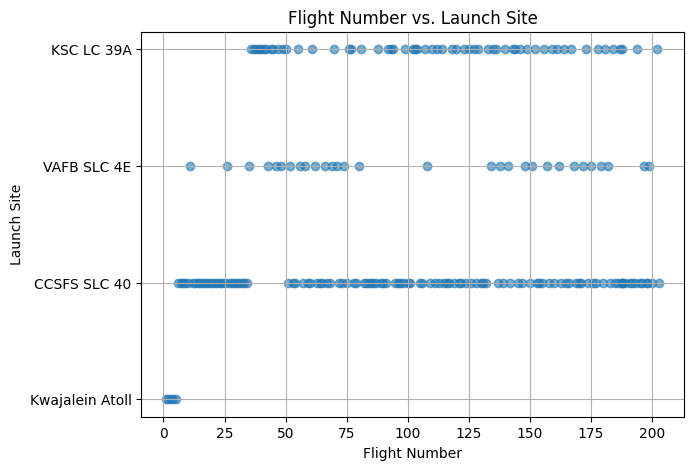

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_launches = pd.read_csv("spacex_launches.csv")

df_launchpads = pd.read_csv("spacex_launchpads.csv")

print(df_launchpads.columns)  

if 'id' in df_launchpads.columns and 'name' in df_launchpads.columns:
    launchpad_mapping = df_launchpads.set_index('id')['name'].to_dict()

    df_launches['launch_site'] = df_launches['launchpad'].map(launchpad_mapping)

    if 'flight_number' in df_launches.columns:
        plt.figure(figsize=(7, 5))
        plt.scatter(df_launches["flight_number"], df_launches["launch_site"], alpha=0.6)

        plt.title("Flight Number vs. Launch Site")
        plt.xlabel("Flight Number")
        plt.ylabel("Launch Site")
        plt.grid(True)
        plt.show()
    else:
        print(" 'flight_number' column not found in launches data.")
else:
    print(" 'id' or 'name' column missing in launchpad data.")


   mass_kg                                        Launch Site
0     20.0                      Kwajalein Atoll Omelek Island
1    165.0                      Kwajalein Atoll Omelek Island
2    200.0                      Kwajalein Atoll Omelek Island
3    525.0  Cape Canaveral Space Force Station Space Launc...
4    400.0  Cape Canaveral Space Force Station Space Launc...


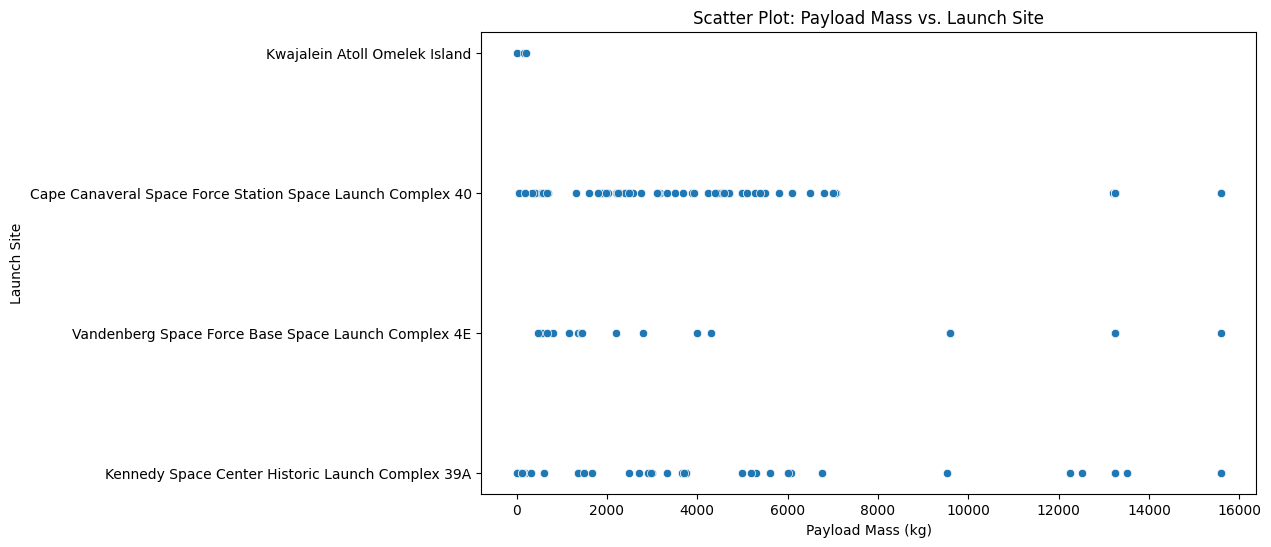

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_launches = pd.read_csv("spacex_launches.csv")
df_payloads = pd.read_csv("spacex_payloads.csv")
df_launchpads = pd.read_csv("spacex_launchpads.csv")

df_launches["payloads"] = df_launches["payloads"].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_launches = df_launches.explode("payloads")

df = df_launches.merge(df_payloads[["id", "mass_kg"]], left_on="payloads", right_on="id", how="left")
df["mass_kg"] = pd.to_numeric(df["mass_kg"], errors="coerce")
df = df.dropna(subset=["mass_kg"])

df = df.merge(df_launchpads[["id", "full_name"]], left_on="launchpad", right_on="id", how="left")
df = df.rename(columns={"full_name": "Launch Site"})

print(df[["mass_kg", "Launch Site"]].dropna().head())

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="mass_kg", y="Launch Site")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.title("Scatter Plot: Payload Mass vs. Launch Site")
plt.show()


In [18]:
import requests
import pandas as pd

url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    df.to_csv("spacex_launches.csv", index=False)
    print("Launches data saved successfully!")
else:
    print("Failed to retrieve data.")


Launches data saved successfully!


In [ ]:
import pandas as pd

df = pd.read_csv("spacex_launches.csv") 
print(df.head()) 
df_launches = pd.read_csv("spacex_launches.csv")
df_payloads = pd.read_csv("spacex_payloads.csv")

df = df_launches.merge(df_payloads, left_on="payloads", right_on="id", how="left")

print(df.head())


                                            fairings  \
0  {'reused': False, 'recovery_attempt': False, '...   
1  {'reused': False, 'recovery_attempt': False, '...   
2  {'reused': False, 'recovery_attempt': False, '...   
3  {'reused': False, 'recovery_attempt': False, '...   
4  {'reused': False, 'recovery_attempt': False, '...   

                                               links  \
0  {'patch': {'small': 'https://images2.imgbox.co...   
1  {'patch': {'small': 'https://images2.imgbox.co...   
2  {'patch': {'small': 'https://images2.imgbox.co...   
3  {'patch': {'small': 'https://images2.imgbox.co...   
4  {'patch': {'small': 'https://images2.imgbox.co...   

       static_fire_date_utc  static_fire_date_unix    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False     0.0   
1                       NaN                    NaN  False     0.0   
2                       NaN                    NaN  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09

C:\Users\Lou\AppData\Local\Temp\ipykernel_10468\1447647191.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged["success"] = df_merged["success"].replace({True: 1, False: 0})


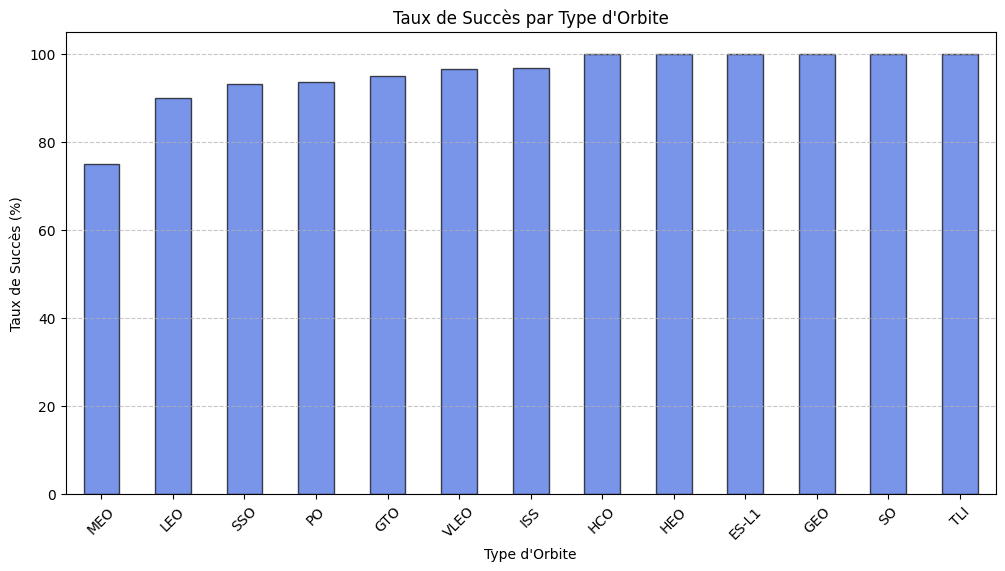

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_launches = pd.read_csv("spacex_launches.csv")

df_payloads = pd.read_csv("spacex_payloads.csv")

df_launches["payloads"] = df_launches["payloads"].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_launches = df_launches.explode("payloads")

df_merged = df_launches.merge(df_payloads[["id", "orbit"]], left_on="payloads", right_on="id", how="left")

df_merged["success"] = df_merged["success"].replace({True: 1, False: 0})
df_merged["success"] = pd.to_numeric(df_merged["success"], errors="coerce").fillna(0)

success_rates = df_merged.groupby("orbit")["success"].mean() * 100

plt.figure(figsize=(12, 6))
success_rates.sort_values().plot(kind="bar", color="royalblue", edgecolor="black", alpha=0.7)
plt.xlabel("Type d'Orbite")
plt.ylabel("Taux de Succès (%)")
plt.title("Taux de Succès par Type d'Orbite")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



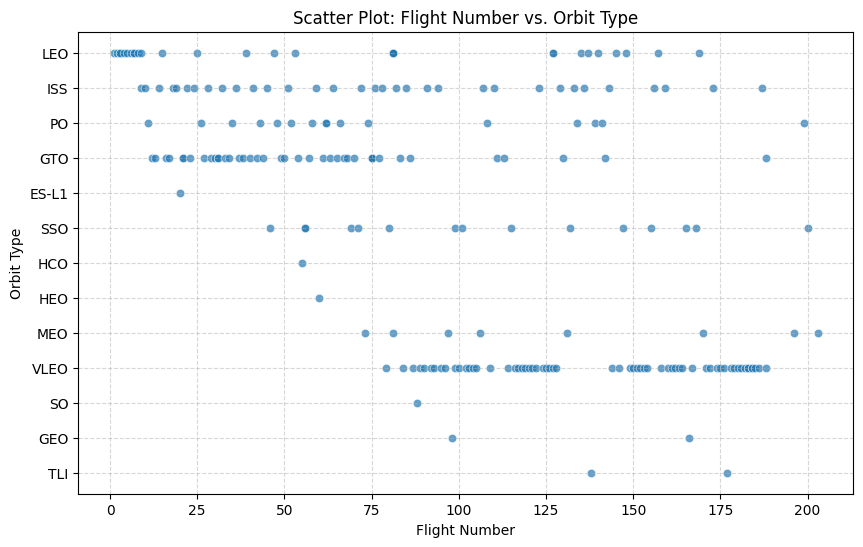

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_launches = pd.read_csv("spacex_launches.csv")

df_payloads = pd.read_csv("spacex_payloads.csv")

df_launches["flight_number"] = pd.to_numeric(df_launches["flight_number"], errors="coerce")

df_launches["payloads"] = df_launches["payloads"].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_launches = df_launches.explode("payloads")

df_merged = df_launches.merge(df_payloads[["id", "orbit"]], left_on="payloads", right_on="id", how="left")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x="flight_number", y="orbit", alpha=0.7)

plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.title("Scatter Plot: Flight Number vs. Orbit Type")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


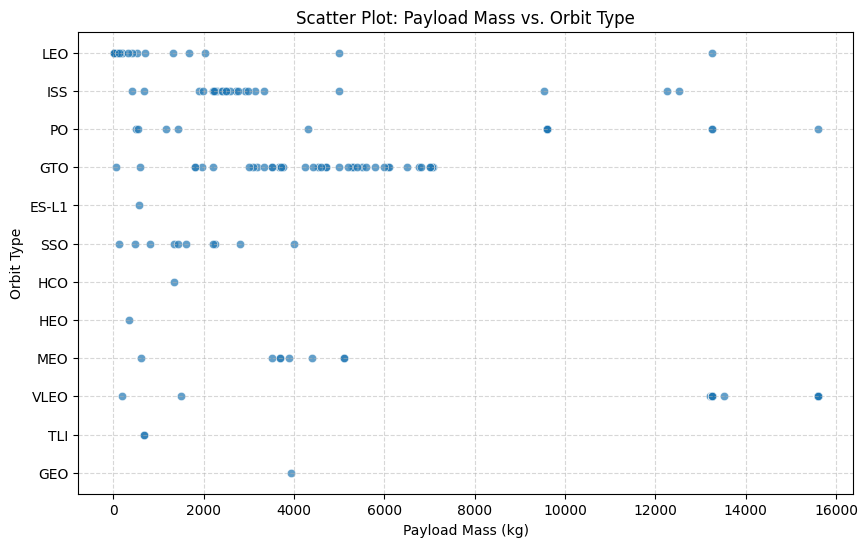

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_launches = pd.read_csv("spacex_launches.csv")

df_payloads = pd.read_csv("spacex_payloads.csv")

df_launches["payloads"] = df_launches["payloads"].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_launches = df_launches.explode("payloads")

df_merged = df_launches.merge(df_payloads[["id", "orbit", "mass_kg"]], 
                              left_on="payloads", 
                              right_on="id", 
                              how="left")

df_merged["mass_kg"] = pd.to_numeric(df_merged["mass_kg"], errors="coerce")

df_merged.dropna(subset=["orbit", "mass_kg"], inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x="mass_kg", y="orbit", alpha=0.7)

plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.title("Scatter Plot: Payload Mass vs. Orbit Type")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


C:\Users\Lou\AppData\Local\Temp\ipykernel_19452\2267367907.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["success"] = df["success"].replace({True: 1, False: 0})


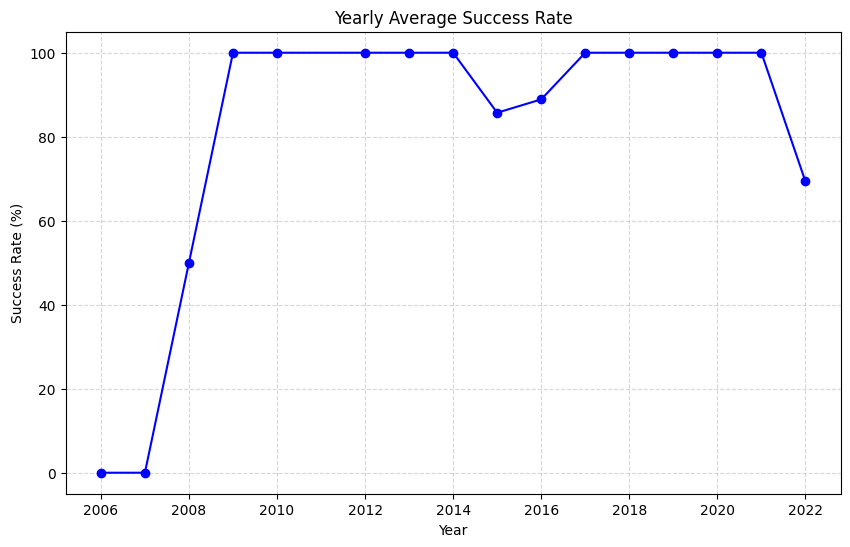

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("spacex_launches.csv")

df["success"] = df["success"].replace({True: 1, False: 0})
df["success"] = pd.to_numeric(df["success"], errors="coerce").fillna(0)

df["date_utc"] = pd.to_datetime(df["date_utc"], errors="coerce")
df["year"] = df["date_utc"].dt.year

yearly_success = df.groupby("year")["success"].mean() * 100

plt.figure(figsize=(10, 6))
yearly_success.plot(kind="line", marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.title("Yearly Average Success Rate")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [40]:
import pandas as pd

df = pd.read_csv("spacex_launches_scraped.csv")

unique_sites = df["Launch site"].unique()
print("Unique Launch Sites:")
print(unique_sites)


Unique Launch Sites:
['Cape Canaveral, SLC‑40' 'Vandenberg, SLC‑4E' 'TBA (FL)' 'TBD'
 'Kennedy, LC‑39A' 'TBA (FL)[542]']


In [43]:
df.columns
data.columns 

Index(['flightnumber', 'date', 'boosterversion', 'payloadmass', 'orbit',
       'launchsite', 'outcome', 'flights', 'gridfins', 'reused', 'legs',
       'landingpad', 'block', 'reusedcount', 'serial', 'longitude', 'latitude',
       'class'],
      dtype='object')

In [ ]:
import pandas as pd

df = pd.read_csv("spacex_launches_scraped.csv")

unique_sites = df["Launch site"].unique()
print("Unique Launch Sites:")
print(unique_sites)


Unique Launch Sites:
['Cape Canaveral, SLC‑40' 'Vandenberg, SLC‑4E' 'TBA (FL)' 'TBD'
 'Kennedy, LC‑39A' 'TBA (FL)[542]']


In [ ]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df_ground = df[df['outcome'].str.contains("true", case=False, na=False) &
               df['outcome'].str.contains("rtls", case=False, na=False)]

df_ground_sorted = df_ground.sort_values(by='date')

earliest_date = df_ground_sorted['date'].min()

print("First successful landing on a ground pad occurred on:", earliest_date)
print("Records with the earliest successful ground pad landing:")
print(df_ground_sorted[df_ground_sorted['date'] == earliest_date][['date', 'landingpad', 'outcome']])


First successful landing on a ground pad occurred on: 2015-12-22 00:00:00
Records with the earliest successful ground pad landing:
         date                landingpad    outcome
16 2015-12-22  5e9e3032383ecb267a34e7c7  True RTLS


In [ ]:
import pandas as pd
import folium

df_launches = pd.read_csv("spacex_launches.csv")

df_launchpads = pd.read_csv("spacex_launchpads.csv")

df_launches.columns = df_launches.columns.str.strip().str.lower().str.replace(' ', '')
df_launchpads.columns = df_launchpads.columns.str.strip().str.lower().str.replace(' ', '')

df_merged = df_launches.merge(df_launchpads[['id', 'latitude', 'longitude', 'full_name']], 
                              left_on="launchpad", right_on="id", how="left")

def marker_color(success):
    if pd.isna(success):
        return "blue"
    return "green" if success else "red"

m = folium.Map(location=[20, 0], zoom_start=2)

for idx, row in df_merged.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    if pd.notnull(lat) and pd.notnull(lon):
        site_name = row['full_name'] if pd.notnull(row['full_name']) else row['launchsite']
        success_val = row['success']
        color = marker_color(success_val)
        popup_text = f"Site: {site_name}<br>Success: {success_val}"
        folium.Marker(location=[lat, lon],
                      popup=popup_text,
                      icon=folium.Icon(color=color)).add_to(m)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Color-Labeled Launch Outcomes</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m.save("color_labeled_launch_outcomes_map.html")

m


In [ ]:
import pandas as pd
import folium

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '')

def outcome_color(outcome_str):
    if isinstance(outcome_str, str):
        outcome_str = outcome_str.lower()
        if "true" in outcome_str:
            return "green"   # Successful outcome
        elif "false" in outcome_str:
            return "red"     # Failed outcome
    return "blue"            # Default for "none" or unknown

m = folium.Map(location=[20, 0], zoom_start=2)

for _, row in df.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    if pd.notnull(lat) and pd.notnull(lon):
        color = outcome_color(str(row["outcome"]))
        popup_text = f"Flight #{row['flightnumber']}<br>Outcome: {row['outcome']}"
        folium.Marker(
            location=[lat, lon],
            popup=popup_text,
            icon=folium.Icon(color=color)
        ).add_to(m)

title_html = '''
    <h3 align="center" style="font-size:20px"><b>Color-Labeled Launch Outcomes</b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

m.save("color_labeled_outcomes.html")

m


In [ ]:
import folium
from geopy.distance import geodesic

launch_site = {"name": "Cape Canaveral, SLC‑40", "coords": (28.5721, -80.6480)}

features = [
    {"name": "Railway Station", "coords": (28.5685, -80.6400), "description": "Nearest railway station"},
    {"name": "Highway", "coords": (28.5750, -80.6550), "description": "Major highway access"},
    {"name": "Coastline", "coords": (28.5800, -80.6600), "description": "Proximity to the coastline"},
    {"name": "Airport", "coords": (28.5700, -80.6300), "description": "Nearest airport"},
    {"name": "Bus Terminal", "coords": (28.5650, -80.6500), "description": "Local bus terminal"}
]

m = folium.Map(location=launch_site["coords"], zoom_start=14)

folium.Marker(
    location=launch_site["coords"],
    popup=f"<b>{launch_site['name']}</b>",
    icon=folium.Icon(color="blue", icon="rocket", prefix="fa")
).add_to(m)

for feature in features:
    distance_km = geodesic(launch_site["coords"], feature["coords"]).km
    popup_text = f"{feature['name']}<br>{feature['description']}<br>Distance: {distance_km:.2f} km"
    folium.Marker(
        location=feature["coords"],
        popup=popup_text,
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(m)
    folium.PolyLine(
        locations=[launch_site["coords"], feature["coords"]],
        color="gray",
        weight=2,
        dash_array="5,5"
    ).add_to(m)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Cape Canaveral: Infrastructure Proximities</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m.save("cape_canaveral_infrastructure_full_map.html")

m


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

if 'outcome' in df.columns:
    outcome_col = 'outcome'
else:
    potential = [col for col in df.columns if "outcome" in col]
    if potential:
        outcome_col = potential[0]
    else:
        raise KeyError("No outcome column found in the dataset.")

df_success = df[df[outcome_col].str.contains("true", case=False, na=False)]

success_counts = df_success['launchsite'].value_counts().reset_index()
success_counts.columns = ['launchsite', 'count']

fig = px.pie(
    success_counts, 
    values='count', 
    names='launchsite', 
    title="Launch Success Count by Site (Absolute Numbers)"
)
fig.update_traces(textinfo='label+value')

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("SpaceX Launch Dashboard"),
    dcc.Graph(id="pie-chart", figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns in dataset:", df.columns)

df['is_success'] = df['outcome'].str.contains("true", case=False, na=False)


df_filtered = df[df['outcome'].str.contains("true|false", case=False, na=False)]
print("Filtered dataset count:", len(df_filtered))

grouped = df_filtered.groupby('launchsite')['is_success'].agg(
    successes = lambda x: x.sum(),
    total = 'count'
).reset_index()

grouped['failure'] = grouped['total'] - grouped['successes']
grouped['success_ratio'] = grouped['successes'] / grouped['total']
print("Grouped data by launch site:")
print(grouped)

best_site = grouped.sort_values(by='success_ratio', ascending=False).iloc[0]['launchsite']
print("Launch site with highest success ratio:", best_site)

df_best = df_filtered[df_filtered['launchsite'] == best_site]
counts = df_best['is_success'].value_counts().reset_index()
counts.columns = ['success_status', 'count']
counts['status'] = counts['success_status'].map({True: "Success", False: "Failure"})
print("Counts for best site:")
print(counts)

fig = px.pie(counts, values='count', names='status', 
             title=f"Launch Outcomes at {best_site} (Highest Success Ratio)",
             color='status',
             color_discrete_map={"Success": "green", "Failure": "red"})
fig.update_traces(textinfo='label+value')

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("SpaceX Launch Outcomes Dashboard"),
    dcc.Graph(id="pie-chart", figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True)


Columns in dataset: Index(['flightnumber', 'date', 'boosterversion', 'payloadmass', 'orbit',
       'launchsite', 'outcome', 'flights', 'gridfins', 'reused', 'legs',
       'landingpad', 'block', 'reusedcount', 'serial', 'longitude', 'latitude',
       'class'],
      dtype='object')
Filtered dataset count: 69
Grouped data by launch site:
     launchsite  successes  total  failure  success_ratio
0  CCAFS SLC 40         33     39        6       0.846154
1    KSC LC 39A         17     18        1       0.944444
2   VAFB SLC 4E         10     12        2       0.833333
Launch site with highest success ratio: KSC LC 39A
Counts for best site:
   success_status  count   status
0            True     17  Success
1           False      1  Failure


In [ ]:
from dash import dcc, html, Output, Input

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['payloadmass'] = pd.to_numeric(df['payloadmass'], errors='coerce')
df = df.dropna(subset=['payloadmass'])

min_payload = df['payloadmass'].min()
max_payload = df['payloadmass'].max()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Payload vs. Launch Outcome Scatter Plot"),
    dcc.RangeSlider(
        id="payload-slider",
        min=min_payload,
        max=max_payload,
        step=100,
        value=[min_payload, max_payload],
        marks={
            int(min_payload): f"{int(min_payload)}",
            int(max_payload): f"{int(max_payload)}"
        }
    ),
    dcc.Graph(id="scatter-plot")
])

@app.callback(
    Output("scatter-plot", "figure"),
    [Input("payload-slider", "value")]
)
def update_scatter(payload_range):
    low, high = payload_range
    filtered_df = df[(df['payloadmass'] >= low) & (df['payloadmass'] <= high)]
    fig = px.scatter(
        filtered_df,
        x="payloadmass",
        y="outcome",
        color="launchsite",
        hover_data=["flightnumber", "boosterversion"],
        title="Payload vs. Launch Outcome"
    )
    fig.update_xaxes(title="Payload Mass (kg)")
    fig.update_yaxes(title="Launch Outcome")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [83]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px

data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "XGBoost"],
    "Accuracy": [0.85, 0.78, 0.90, 0.82, 0.88]
}

df_accuracy = pd.DataFrame(data)
df_accuracy["Accuracy"] = df_accuracy["Accuracy"] * 100

fig = px.bar(
    df_accuracy,
    x="Model",
    y="Accuracy",
    text="Accuracy",
    title="Classification Model Accuracy Comparison",
    labels={"Accuracy": "Accuracy (%)"},
    color="Model",
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()


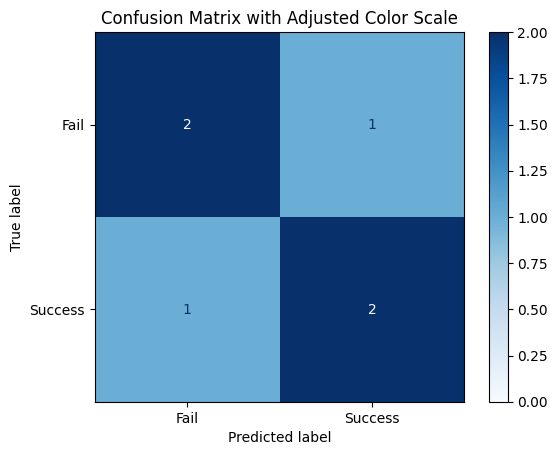

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test = np.array(["Fail", "Fail", "Success", "Fail", "Success", "Success"])
y_pred = np.array(["Fail", "Success", "Success", "Fail", "Success", "Fail"])

cm = confusion_matrix(y_test, y_pred, labels=["Fail", "Success"])

disp = ConfusionMatrixDisplay(cm, display_labels=["Fail", "Success"])

fig, ax = plt.subplots()
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=True)

max_cell = cm.max()
disp.im_.set_clim(0, max_cell)

ax.set_title("Confusion Matrix with Adjusted Color Scale")
plt.show()
